# Code to generate sub graphs of a given graph G1 and store the two graphs (G1 and G2) in a pair so that a Graph-SubGraph Pair is generated. 

Features to Add:
- A loop iterates i (nbumber of nodes in subgraph) over numbers from 3 to (n1 - 1) to generate graph-subgraph pairs, geenrate a name or that pair and use that name as the filename, and store that pair as a list of networkX graphs using pickle. 
- turn this into a script
- Could make a nested list of all the graph-subgraph pairs of a given main graph with n1 number of nodes. i.e. one pickle file that is essentially a list of al the graph-subgraph pairs that are possible for a certain n1 (number of nodes of main graph). So that for graphs with n1 = 5 to ??? (My guess is to go till n1 = 20 for now and see how the algorithm performs)

Imports


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random 
import pickle

### Lets start by generating a random graph
The mosttypicall example used in many graph isomorphism papers is a random graph generated by Erdos-Renyi Graph model 
This can be done using the NetworkX in-built repository. 

Reference: Zick's paper <br>

`Simple undirected N -vertex graphs were constructed according to the Erd ̋os-R ́enyi G (n, p) model20 with n = N and with the probability p of including each edge equal to 0.5. Non-isomorphic pairs were generated by creating two graphs as above and checking for non-isomorphism using the MATLAB graphisomorphism() function. Isomorphic pairs were generated by generating a single graph then applying a random permutation to arrive at the second graph.`

Defining number of nodes and the probability of there being an edge between any two nodes

In [2]:
n1 = 10 # number of nodes in parent graph
p = 0.75 # probability of edge creation between two nodes


**erdos_renyi_graph(n, p, seed = None, directed = False)**
slower

In [3]:
G1_1 = nx.erdos_renyi_graph(n1, p, seed = None, directed = False)

**fast_gnp_random_graph(n, p, seed = None, directed = False)**
faster

In [4]:
G1_2 = nx.fast_gnp_random_graph(n1, p, seed = None, directed = False)

#### Drawing Graph G1

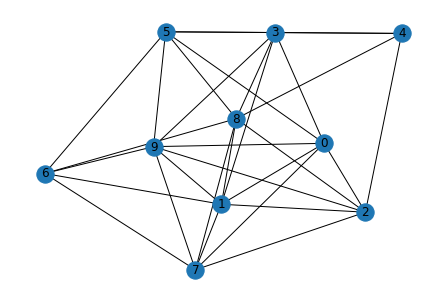

In [5]:
pos = nx.spring_layout(G1_1)
nx.draw(G1_1, 
        pos = pos,
        with_labels = True, 
        node_color = "tab:blue")

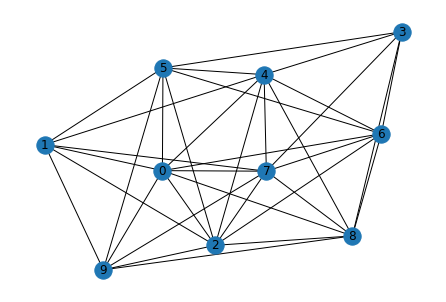

In [6]:
pos = nx.spring_layout(G1_2)
nx.draw(G1_2, 
        pos = pos,
        with_labels = True, 
        node_color = "tab:blue")

### Generating a SubGraph

In [7]:
n2 = 4 # number of nodes in sub graph

Graph.subgraph(nodes)

In [8]:
#SG_1 = G1_1.subgraph(random.sample(list(G1_1.nodes), n2))

In [9]:
SG_1 = G1_1.subgraph(range(n2, G1_1.order()))

### Drawing Sub Graph

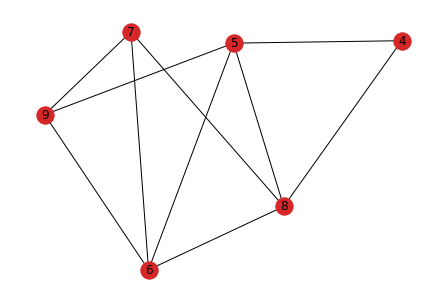

In [10]:
pos = nx.spring_layout(SG_1)
nx.draw(SG_1, 
        pos = pos,
        with_labels = True, 
        node_color = "tab:red")

### Saving the Graph Pair

Using pickle

In [11]:
def save_object(obj, filename):
    try:
        with open(filename, "wb") as f:
            pickle.dump(obj, f, protocol = pickle.HIGHEST_PROTOCOL)
    except Exception as ex:
        print("Error during pickling object (Possibly unsupported)", ex)


In [12]:
filename1 = "larger_graph.pickle"
filename2 = "smaller_graph.pickle"
save_object(G1_1, filename1)
save_object(SG_1, filename2)

### Retrieving the Graph Pair
Using Pickle

In [13]:
def load_object(filename):
    try: 
        with open(filename, "rb") as f:
            return pickle.load(f)
    except Exception as ex:
            print("Error during unpickling object (Possible unsupported)", ex)


In [14]:
graph_pair = [load_object(filename1), load_object(filename2)]

In [15]:
print(graph_pair)

[<networkx.classes.graph.Graph object at 0x127d8d190>, <networkx.classes.graph.Graph object at 0x127c92c10>]


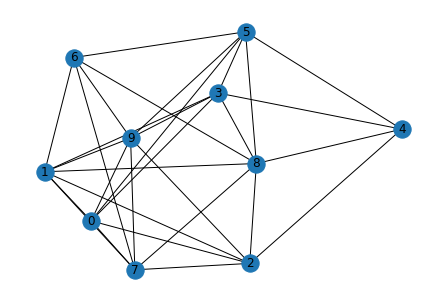

In [16]:
pos = nx.spring_layout(graph_pair[0])
nx.draw(graph_pair[0], 
        pos = pos,
        with_labels = True, 
        node_color = "tab:blue")

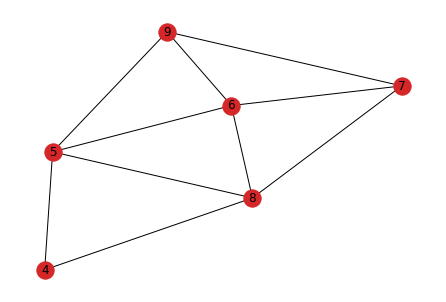

In [17]:
pos = nx.spring_layout(graph_pair[1])
nx.draw(graph_pair[1], 
        pos = pos,
        with_labels = True, 
        node_color = "tab:red")

### References
- Graph.subgraph() - https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html
- Generating subgraphs that are connected by edges - https://stackoverflow.com/questions/29838746/how-to-draw-subgraph-using-networkx
- saving Data in Python using Pickle - https://www.askpython.com/python/examples/save-data-in-python
